In [2]:
#---Matplotlib Architecture---

In [3]:
%matplotlib notebook

In [4]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [5]:
#get and set are used often un mpl variables

In [6]:
#the artist layer is where most time is spent, an abstraction around drawing layout perimeters
#it contains containers such as figure, subplot and axes
#it also contains primitives, such as Line2D and Rectangle, and collections such as PathCollection

#the root of visuals is a set of containers with a figure object with one or more subplots each with a series of one or more axis
#the axis is the most common one with which we will interact with, changing the range of a given access or plotting range to it

#an axis is made of two axes objects (x and y)
#the aritst layer also contains primitives and collections
#a patch is an object with a color object and an edge object


In [7]:
#the scripting layer is particular for data scientists, it helps out to simplify and speed up the interaction with
#the environment in order to build plots quickly
#the magic behind this layer must be understood, in this course it's called pyplot

In [8]:
#Matplotlib's pyplot is an example of a procedural method for building visualizations while SVG, 
#HTML are declarative methods of creating visualizations.

In [9]:
#---Basic Plotting with Matplotlib---
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [10]:
import matplotlib.pyplot as plt
plt.plot?

<IPython.core.display.Javascript object>


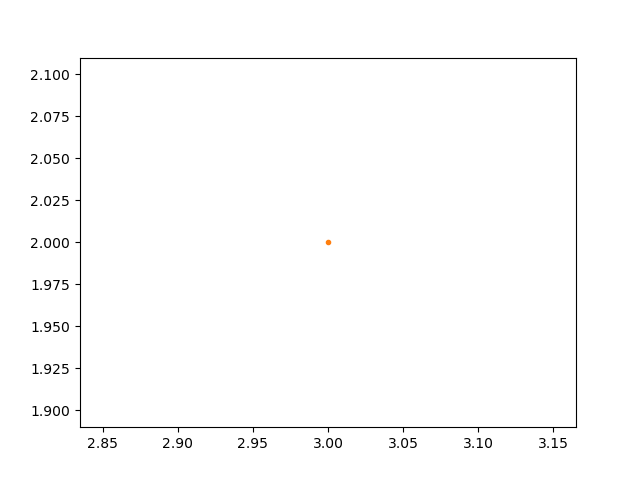

In [11]:
plt.plot(3,2)

In [12]:
plt.plot(3, 2, '.')

In [13]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvasAgg(fig)

ax = fig.add_subplot(111) #111 means we want one subplot
ax.plot(3, 2, '.')
canvas.print_png('test.png') #saving the figure to a png file

In [14]:
%%html
<img src='test.png' />

<IPython.core.display.Javascript object>


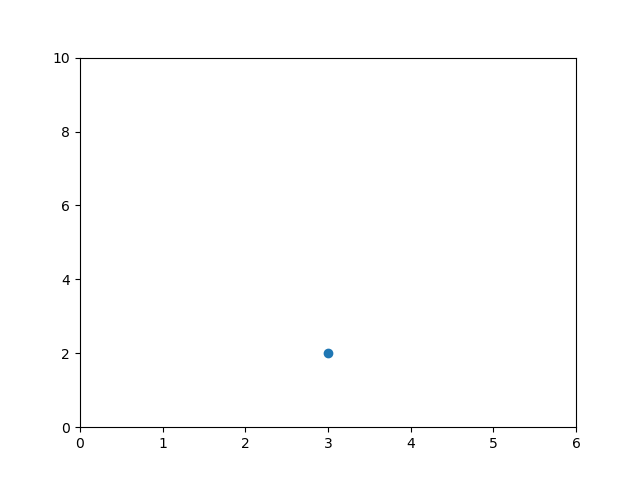

[0, 6, 0, 10]

In [15]:
#creating a new figure with pyplot
#this wont update the figure above
plt.figure()
plt.plot(3, 2, 'o')
ax = plt.gca() #get current axis
ax.axis([0,6,0,10]) #grabbing the axis and setting x and y

<IPython.core.display.Javascript object>


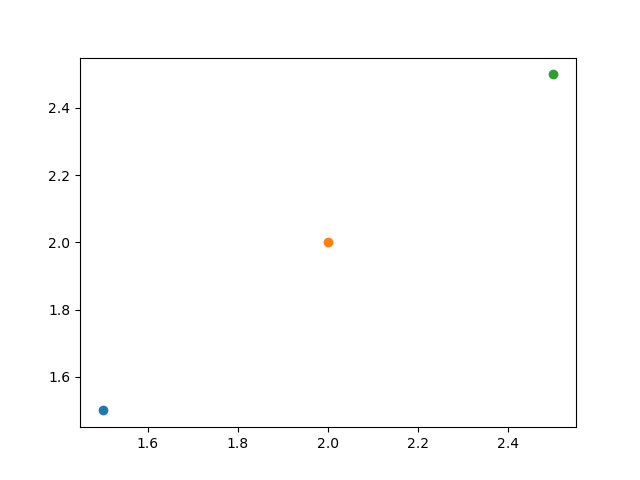

In [16]:
#the axes function takes four parameters, minimum value for x, maximum for x, minimum and max for y

plt.figure()
plt.plot(1.5, 1.5, 'o')
plt.plot(2, 2, 'o')
plt.plot(2.5, 2.5, 'o')

In [17]:
#we can get the child objects that the axis contains
ax = plt.gca()
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

<IPython.core.display.Javascript object>


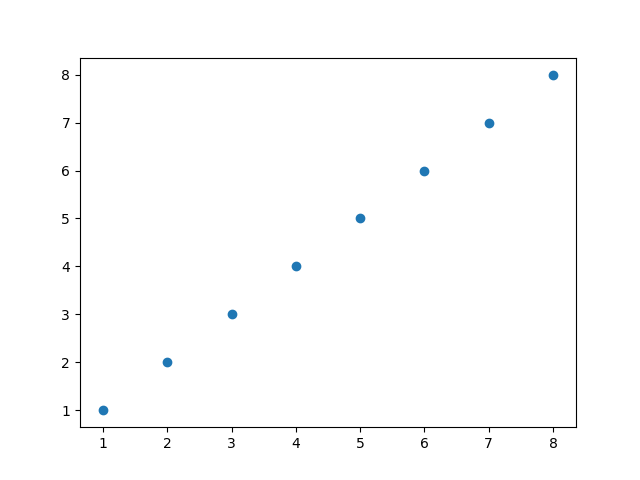

In [18]:
#---Scatterplots---
import numpy as np
x = np.array([1,2,3,4,5,6,7,8])
y = x
plt.figure()
plt.scatter(x,y)

<IPython.core.display.Javascript object>


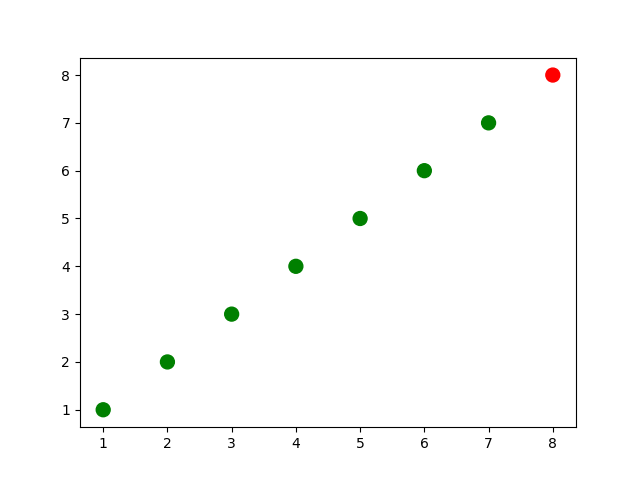

In [19]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()
plt.scatter(x, y, s=100, c=colors)

In [20]:
#zip example
#creating a zip generator with the zip function passing in two lists of numbers
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
#converting the generator to a list to see it's paired-wise tuples
list(zip_generator)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

In [21]:
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
x,y = zip(*zip_generator)
print(x)
print(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


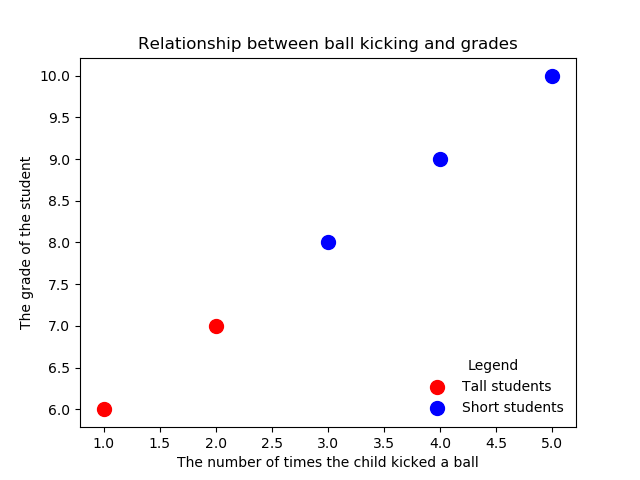

In [22]:
#getting back to plotting
#taking these two lists and plot them using scatter 
#slicing the lists to plot them as two data series
plt.figure()
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

In [23]:
plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship between ball kicking and grades')

Text(0.5, 1.0, 'Relationship between ball kicking and grades')

In [24]:
plt.legend()

In [25]:
plt.legend(loc=4, frameon=False, title='Legend')

In [26]:
plt.gca().get_children()

 Text(0.5, 1.0, 'Relationship between ball kicking and grades'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [27]:
legend = plt.gca().get_children()[-2]

In [28]:
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [29]:
from matplotlib.artist import Artist

#recursion function
def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        print(" " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)
rec_gc(legend)

Legend
      Text(0, 0, 'Legend')
            Text(0, 0, 'Tall students')
            Text(0, 0, 'Short students')
  FancyBboxPatch((0, 0), width=1, height=1)


<IPython.core.display.Javascript object>


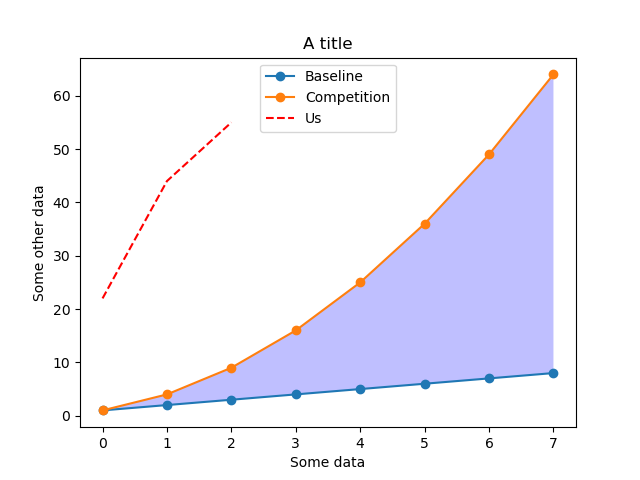

In [30]:
#---Line Plots---
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
quadratic_data = linear_data**2

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o') #-o means using connected dots

In [31]:
plt.plot([22,44,55], '--r') #using dashes

In [32]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline', 'Competition', 'Us'])

In [33]:
#the fill between function isn't specific to line plots, if we want to highlight the difference between the green and blue curves
#we tell the axis to paint a color between the two
plt.gca().fill_between(range(len(linear_data)),
                      linear_data, quadratic_data,
                      facecolor='blue',
                      alpha=0.25)

<IPython.core.display.Javascript object>


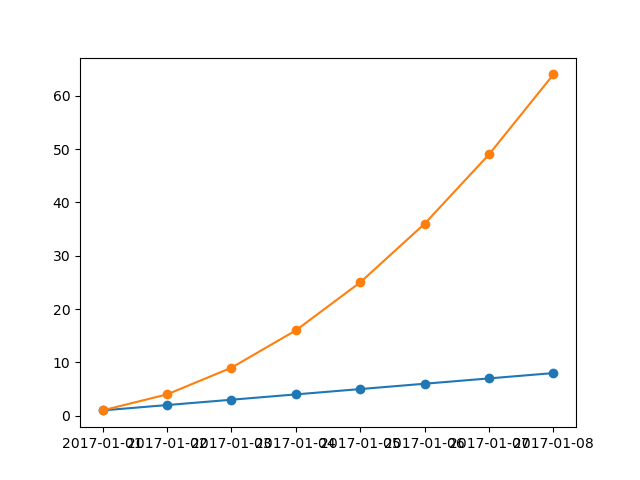

In [34]:
#this works greatly for standard deviation
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

<IPython.core.display.Javascript object>


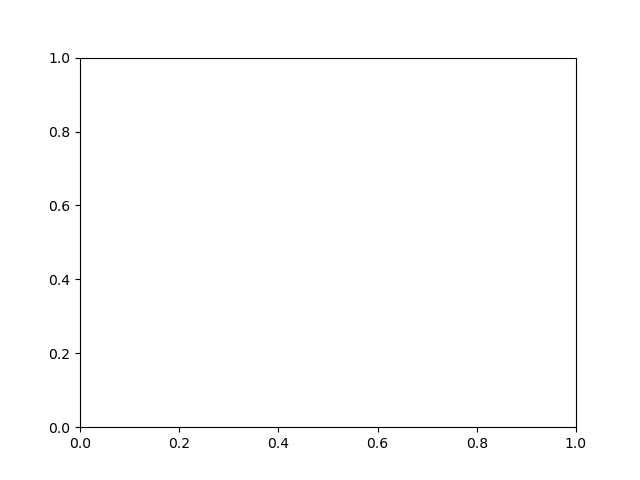

RuntimeError: matplotlib does not support generators as input

In [35]:
#date-time handling is quite hard in python
#the helper library todatetime helps out with handling this type of data
#converting numpy dates into standard library dates

import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates)
plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

In [ ]:
#the problem is that the map function returns an iterator, which cannot be handled by matplotlib so we convert it to a list first
#a quick but kind of inneficient way to solve this and handle data
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates))
plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

In [ ]:
#to avoid the dates from overlaping, we can strip the year, because everything is from 2017
#or change the rotation
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)

In [ ]:
plt.subplots_adjust(bottom=0.25) #adjusting the subplot so that the text is easier to read

In [ ]:
#matplotlib can also use LaTeX
#you can use a subset of LaTeX in the labels and matplotlib will render them as equations
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Quadratic vs. Linear performance')

In [ ]:
ax.set_title("Quadratic ($x^2$) vs. Linear ($x$) performance")

<IPython.core.display.Javascript object>


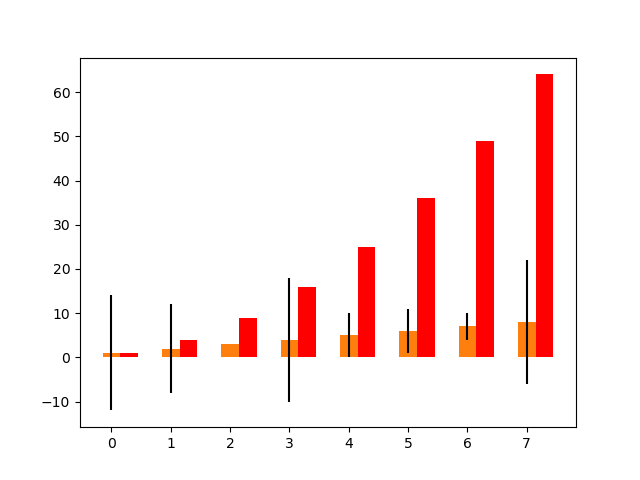

<BarContainer object of 8 artists>

In [36]:
#---Bar Charts---
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [37]:
#adding a second bar
new_xvals = []
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(new_xvals, quadratic_data, width = 0.3, color = 'red')

<BarContainer object of 8 artists>

In [38]:
#adding error bars
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))]
plt.bar(xvals, linear_data, width = 0.3, yerr = linear_err)

<BarContainer object of 8 artists>

<IPython.core.display.Javascript object>


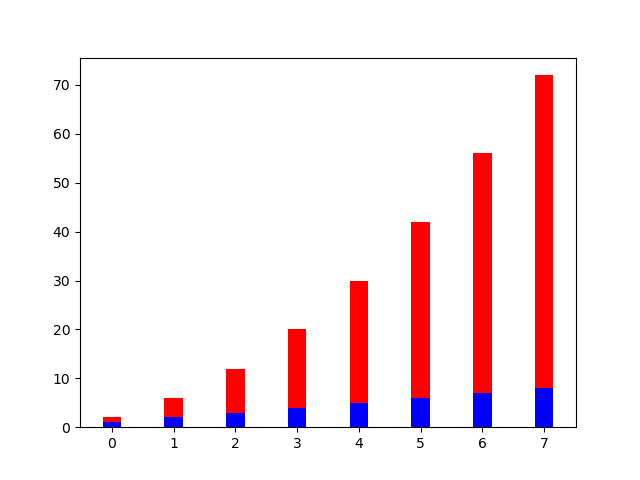

<BarContainer object of 8 artists>

In [39]:
#stacked bar charts
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color = 'b')
plt.bar(xvals, quadratic_data, width = 0.3, bottom = linear_data, color = 'r')

<IPython.core.display.Javascript object>


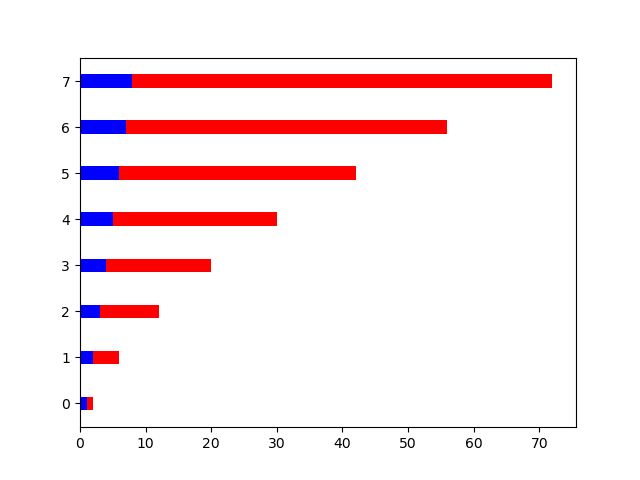

<BarContainer object of 8 artists>

In [40]:
#pivotting the bar graph into a horizontal one
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color = 'b')
plt.barh(xvals, quadratic_data, height = 0.3, left=linear_data, color = 'r')

<IPython.core.display.Javascript object>


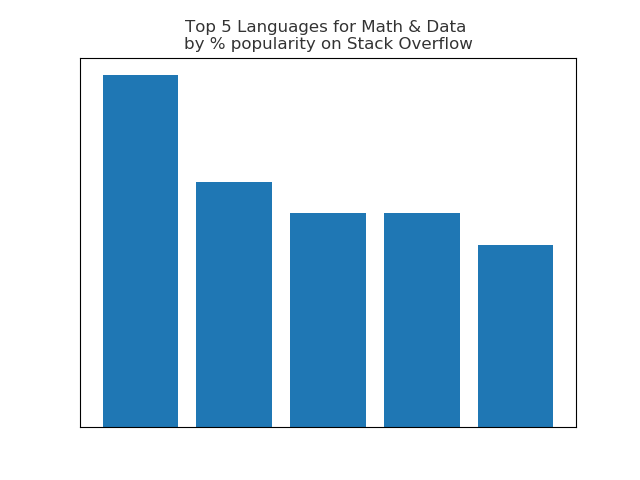

In [41]:
#---Dejunkifying a Plot---

#Here's some sample code which has the ticks, can you figure out how to remove them? 

#Press run to see the generated image, and press continue to see my solution.

#Task: Remove all the ticks (both axes), and tick labels on the Y axis.
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

#TODO: remove all the ticks (both axes), and tick labels on the Y axis

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()

<IPython.core.display.Javascript object>


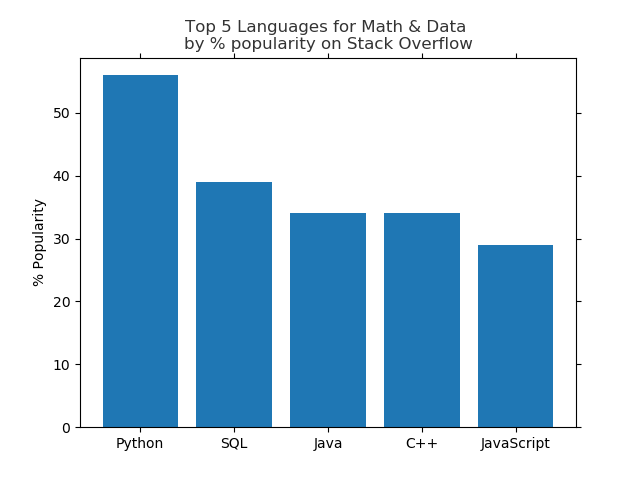

In [44]:
#another solution:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.show()

<IPython.core.display.Javascript object>


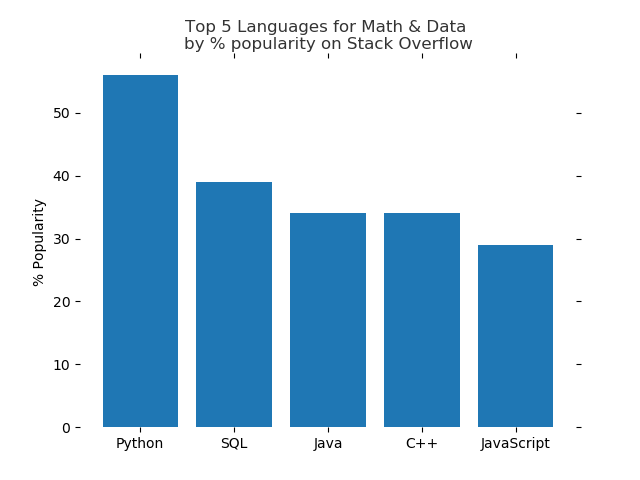

In [45]:
#Task: Remove the frame of the chart.
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# TODO: remove the frame of the chart
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)

plt.show()

<IPython.core.display.Javascript object>


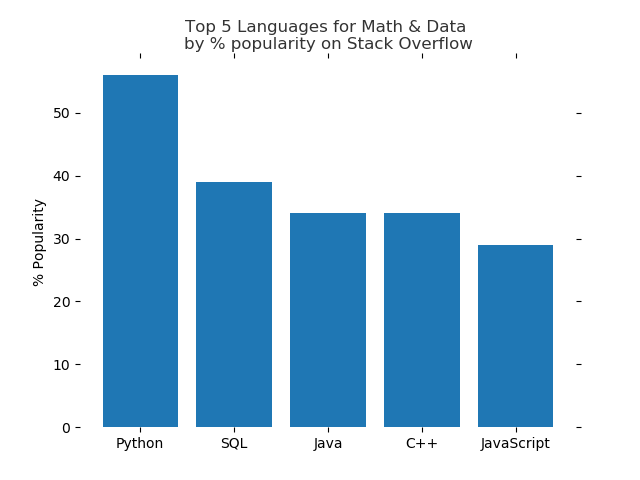

In [46]:
#another solution:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


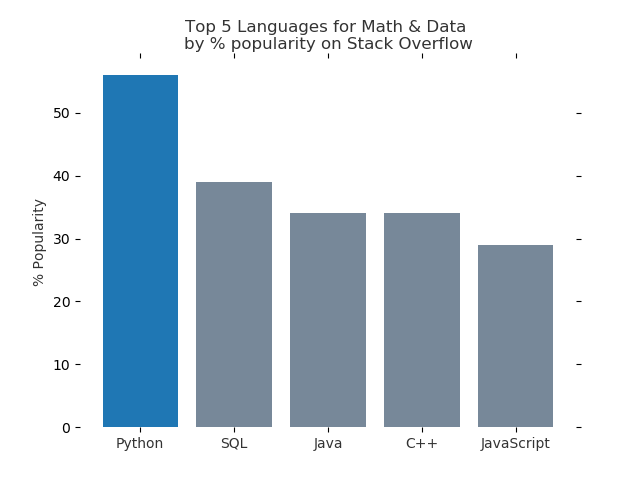

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


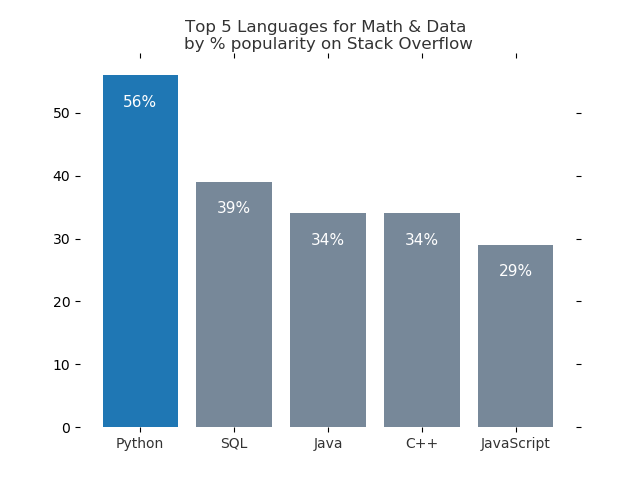

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')
# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()